# Tensorflow를 활용한 정확도

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image

print ("training model")

classes = ["na_left", "na_right", "shin_left", "shin_right"]

num_right_train = 10
num_left_train = 10
num_right1_train = 5
num_left1_train = 5

pic = np.array(Image.open("train\\shin_right" + str(0) + ".jpg"))
train_images = np.array([pic])
train_labels = np.array([3]*num_right_train + [2]*num_left_train + [1]*num_right1_train + [0]*num_left1_train)

for i in range(1, num_right_train):
    pic = np.array(Image.open("train\\shin_right" + str(i) + ".jpg"))
    train_images = np.vstack((train_images, np.array([pic])))

for i in range(num_left_train):
    pic = np.array(Image.open("train\\shin_left" + str(i) + ".jpg"))
    train_images = np.vstack((train_images, np.array([pic])))
    
for i in range(num_right1_train):
    pic = np.array(Image.open("train\\na_right" + str(i) + ".jpg"))
    train_images = np.vstack((train_images, np.array([pic])))
    
for i in range(num_left1_train):
    pic = np.array(Image.open("train\\na_left" + str(i) + ".jpg"))
    train_images = np.vstack((train_images, np.array([pic])))

train_images = train_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(240, 285)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# predict
pic = np.array(Image.open("test\\shin_left.jpg"))
test_images = np.array([pic])
print ("\nshin_left_result")
predictions = model.predict(test_images)
print (predictions)
print ("final answer:")
print (classes[np.argmax(predictions[0])])

pic = np.array(Image.open("test\\shin_right.jpg"))
test_images = np.array([pic])
print ("\nshin_right_result")
predictions = model.predict(test_images)
print (predictions)
print ("final answer:")
print (classes[np.argmax(predictions[0])])

pic = np.array(Image.open("test\\na_right.jpg"))
test_images = np.array([pic])
print ("\nna_right_result")
predictions = model.predict(test_images)
print (predictions)
print ("final answer:")
print (classes[np.argmax(predictions[0])])

pic = np.array(Image.open("test\\na_left.jpg"))
test_images = np.array([pic])
print ("\nna_left_result")
predictions = model.predict(test_images)
print (predictions)
print ("final answer:")
print (classes[np.argmax(predictions[0])])

training model
Train on 30 samples
Epoch 1/5
30/30 [==============================] - 1s 22ms/sample - loss: 1.4113 - acc: 0.4000
Epoch 2/5
30/30 [==============================] - 0s 2ms/sample - loss: 0.4365 - acc: 0.8000
Epoch 3/5
30/30 [==============================] - 0s 2ms/sample - loss: 1.3760e-04 - acc: 1.0000
Epoch 4/5
30/30 [==============================] - 0s 2ms/sample - loss: 2.3722e-06 - acc: 1.0000
Epoch 5/5
30/30 [==============================] - 0s 2ms/sample - loss: 2.8610e-07 - acc: 1.0000

shin_left_result
[[0. 0. 1. 0.]]
final answer:
shin_left

shin_right_result
[[0. 0. 0. 1.]]
final answer:
shin_right

na_right_result
[[0. 1. 0. 0.]]
final answer:
na_right

na_left_result
[[1. 0. 0. 0.]]
final answer:
na_left


- 2명의 왼쪽, 오른쪽 정맥 사진을 훈련시켜 test 해 본 결과 모두 정확히 나왔다.

# Train 이미지

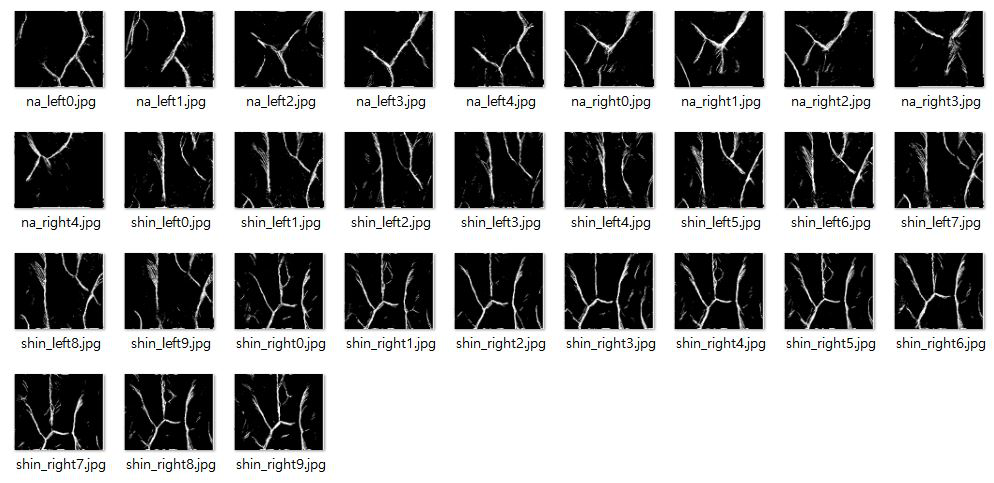

In [62]:
from PIL import Image

image0 = Image.open("images\\train_image.JPG")
image0

# test 이미지 

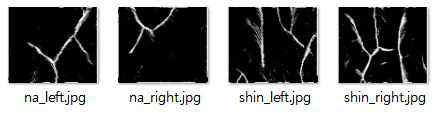

In [63]:
image1 = Image.open("images\\test_image.JPG")
image1